In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, precision_score, confusion_matrix


In [3]:
flower = pd.read_csv("C:/Users/Mail Moolbaes/Desktop/Scoo/CSC 316/Iris.csv")

In [10]:
print(flower.shape)

print(flower.nunique())

print(flower.isna().sum())

(150, 6)
Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [11]:
flower.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [19]:
y = flower['Species']
x = flower.drop(['Species'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .2)

In [26]:
LogitModel = LogisticRegression(max_iter=1000)
LogitModel.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = LogitModel.predict(x_test)

# model metrics
#print("Intercept:", LogitModel.intercept_)
#print("Coefficients:", LogitModel.coef_)

MacroPrecision = precision_score(y_test, y_pred, average='macro')
MicroPrecision = precision_score(y_test, y_pred, average='micro')
WeightedPrecision = precision_score(y_test, y_pred, average='weighted')
Confusion = confusion_matrix(y_test, y_pred, labels=LogitModel.classes_)


print(f'Macro Precision: {MacroPrecision}')
print(f'Micro Precision: {MicroPrecision}')
print(f'Weighted Precision: {WeightedPrecision}')

Macro Precision: 1.0
Micro Precision: 1.0
Weighted Precision: 1.0
[[10  0  0]
 [ 0  6  0]
 [ 0  0 14]]


<Axes: >

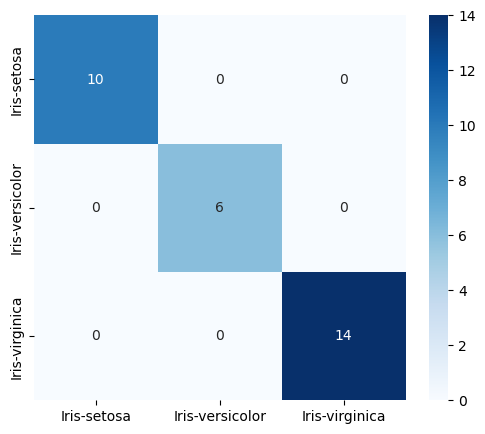

In [46]:
plt.figure(figsize=(6,5))
sns.heatmap(Confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=LogitModel.classes_,
            yticklabels=LogitModel.classes_)